# SciView
The content of this notebook can be applied after the download and transformation of the scientific pdf files into the corresponding text files has been executed. The main processes execute here is the preprocessing of the text of the scientifc articles, the alignment to a reference dataset in order map scientificc article meta data and the fulltext of the articles and the bulding of NLP models based on the fulltext of scientific articles.

## Glossary
- **DOI**
  - digital object identifier, sometimes also written in lowercase, so "doi". Acts as the main identifier and index for the fulltext files and in the reference dataset.
- "DOI prefix" ->
- "DOI suffix"
- "DOI - filepath dictionary" ->
- "text files" -> 
- "scientific articles" ->
- "directory number"            ->
- "unpaywall dataset"
- "reference dataset"
- "meta data"
- "preprocessing meta data"
- "preprocessing"


# 1) Preprocess millions of documents

**1.1) Libraries and Paths**

**1.2) Create DOI - filepath dictionaries**

**1.3) Integrity check of created dictionary**

## 1.1) Libraries, Paths and Variables

In this section the necessary Python libraries are loded and used throughout the whole corresponding chapter. Furthermore all of the content of the env_Juptyer files is globally loaded and contains path and defined variables.


In [16]:
# Load packages
from Functions.F1_Subsets_and_PreProcessing import DOI_Path_Dictionary, Random_DOI_Path_Pair, Dict_Loader, Preprocessed_Dict_and_Metadata, Chunks, Get_DOI_Prefix
import pickle
import pandas as pd
import gensim
import time
import gc
import os
import multiprocess as mp # For Jupyter Notebook the multiprocess Library instead of the multiprocessing library is used.

In [17]:
from env_Jupyter import *
# with open('env_Jupyter.py', 'r') as f:
#     print(f.read())

## 1.2) Create DOI - filepath dictionaries
Every file (e.g. text file of scientific article) is named based on it's DOI. The files are further saved under specific directories and therefore in order to load a specific file via the DOI the full path has to be known. In order to facilitate this a dictionary is created for every directory containing up to 100'000 text files (scientifc articles). The dictionary then maps the full path, which is the directory and DOI (filename) as a value the doi (filename) as a key (e.g. {path/doi:doi}).

The directories are numbered and the creation of each corresponding dictionary can be created based on availability of the downloaded and transformed text files. Therefore a start and end directory number can be defined based on which dictionaries need to be created accordingly

In [3]:
# Set the dirs to save doi and paths
DOI2PathDict_StartDir=100
DOI2PathDict_EndDir=875

In order to create the DOI file path dictionaries the DOI_Path_Dictionary function is applied on each directory. The functions creates a dictionary based by iterating through each file name (e.g. the DOI) and the corresponding path.

In [4]:
# Iterate trough data directories
for dirNum in range(DOI2PathDict_StartDir,DOI2PathDict_EndDir+1):

    # Bring for example 27 into the form of "027"
    dirNum=str(dirNum).zfill(3)

    # Define Path for saving
    saveName=(IntermediateData_Path + dirNum + DOIPath_Suffix).replace(" ","")

    # create a binary pickle file 
    f = open(saveName,"wb")

    # Create dictionary
    doiPathDict=DOI_Path_Dictionary(dirNum, DataPath)

    print("Lengt: ", len(doiPathDict), "of dirNum: ", dirNum)

    # write the python object (dict) to pickle file
    pickle.dump(doiPathDict,f)
    
    # close file
    f.close()

Lengt:  99998 of dirNum:  100
Lengt:  99999 of dirNum:  101
Lengt:  100000 of dirNum:  102
Lengt:  99999 of dirNum:  103
Lengt:  100000 of dirNum:  104
Lengt:  100000 of dirNum:  105
Lengt:  99998 of dirNum:  106
Lengt:  99999 of dirNum:  107
Lengt:  100000 of dirNum:  108
Lengt:  100000 of dirNum:  109
Lengt:  99998 of dirNum:  110
Lengt:  99999 of dirNum:  111
Lengt:  99985 of dirNum:  112
Lengt:  100000 of dirNum:  113
Lengt:  99986 of dirNum:  114
Lengt:  99980 of dirNum:  115
Lengt:  10898 of dirNum:  116
Lengt:  100000 of dirNum:  117
Lengt:  99996 of dirNum:  118
Lengt:  99994 of dirNum:  119
Lengt:  100000 of dirNum:  120
Lengt:  100000 of dirNum:  121
Lengt:  100000 of dirNum:  122
Lengt:  100000 of dirNum:  123
Lengt:  100000 of dirNum:  124
Lengt:  100000 of dirNum:  125
Lengt:  99999 of dirNum:  126
Lengt:  100000 of dirNum:  127
Lengt:  100000 of dirNum:  128
Lengt:  100000 of dirNum:  129
Lengt:  100000 of dirNum:  130
Lengt:  100000 of dirNum:  131
Lengt:  99999 of dirNu

## 1.3) Integrity check of created dictionary
Check if the DOI - file path dictionaries are correctly mapped by reading part of the retrieved text and comparing it through a web search of the given DOI

A hardcoded path to a DOI - filepath dictionary is defined

In [2]:
# Define specific doiPath dictionary which is used for the integrity check
doiPathDict_Path=("Y:\\IntermediateData\\003_DOI_Path_Dict.pkl")

The function Random_DOI_Path_Pair selects a random key value paair and prints part of the file. The printed output can be compared through websearch of the DOI

In [3]:
# Load the DOI-Path dictionary
with open(doiPathDict_Path, 'rb') as handle:
    doiPathDict=pickle.load(handle)

# Feed the dictionary to the function which returns a random DOI-Path pair
Random_DOI_Path_Pair(doiPathDict)

The random pair is : ('10.1002/ange.19120251802', 'Y:\\Data\\00300000\\10.1002\\ange.19120251802.txt')
Zeitschriftfir angewandte Chemie
und

Zentralblatt fir technische Chemie.
XXV. Jahrgang.

Heft 18.




## 1.4) Preprocess documents
The preprocessing of the documents is executed through mutiprocessing in order to decrease overall processing time. Jupyter notebooks do not support the **multiprocessing** package ((https://stackoverflow.com/questions/23641475/multiprocessing-working-in-python-but-not-in-ipython/23641560#23641560) but support the **multiprocess** package. Therefore there is also a standalone python script available which utilizes the **multprocessing** package. Also the Jupyter Notebook implementation does not print statements from the functions. 

Adapt start and enddir because it can be different than defined in the modelConfig file

In [14]:
#----------------------------------------#
# If the conda environment does not get correctly activated (e.g. import gensim is not working)
# https://stackoverflow.com/questions/56623269/cmd-warning-python-interpreter-is-in-a-conda-environment-but-the-environment
#----------------------------------------#

# Set the dirs to save doi and paths
StartDir=500
EndDir=599

### 1.4.1) Preprocess documents with Jupyter Notebook Multiprocessing

In [18]:
# Iterate trough data directories
for dirNum in range(StartDir,EndDir+1):

    tic = time.perf_counter()

    #Load the dict
    dictItem=Dict_Loader(dirNum, IntermediateData_Path, DOIPath_Suffix)  
    print("Length of dictionary num:", dirNum, "is", len(dictItem),"First two keys are:", list(dictItem.keys())[0:2])


    # Get a list of unique Doi Prefixes in order to create the corresponding directories
    # doiPathDict=Dict_Loader(dirNum, IntermediateData_Path, DOIPath_Suffix) 
    doiPathDf=pd.DataFrame(dictItem.values())
    doiPrefixUniqueList=list(doiPathDf[0].apply(Get_DOI_Prefix).unique())


    # Create a new folder with the directory number as the name under the IntermediateData_Path
    dirNumPath=IntermediateData_Path + str(dirNum).zfill(3) + "\\"
    if os.path.exists(dirNumPath):
        None
    else:
        os.mkdir(dirNumPath)
        print(dirNumPath," path did not exist and has been created")

    # Create directory for every doi prefix
    for prefix in doiPrefixUniqueList:
        dirNumPrefixPath= IntermediateData_Path + str(dirNum).zfill(3) + "\\" + prefix
        if os.path.exists(dirNumPrefixPath):
            None
        else:
            os.mkdir(dirNumPrefixPath)
            print(dirNumPrefixPath," path did not exist and has been created")
    

    # Init a list which slices the dictionary into multiple dictionaries (each a chunk af 10000)
    slicedDictList=[]
    # Create and append dictionary chunks
    for item in Chunks(dictItem, 10000):
        slicedDictList.append([item,IntermediateData_Path,dirNum])
        print("Length of the slice is:",len(item), "First two keys of the slice are:", list(item.keys())[0:2])

    # Process each dictionary chunk
    print("Available cores: ",mp.cpu_count(), "(Pool = amount of cores)")
    pool = mp.Pool(processes=10)
    print("pool with 10 processes")
    Return=pool.map(Preprocessed_Dict_and_Metadata,slicedDictList)
    pool.close
    print("Preprocessed the text files of dirNum: ", dirNum)

    # Append Metadata
    slicedMetaDataList=[]
    for item in Return:
        slicedMetaDataList.append(item[0])
    metaData = pd.concat(slicedMetaDataList)

    # Append encoidng error dicitonaries
    encErr={}
    for item in Return:
        encErr.update(item[1])

    # Create name for the metaData
    # Bring for example 27 into the form of "027"
    dirNum=str(dirNum).zfill(3)
    # Create path to dictionary
    metaDataName=(IntermediateData_Path + dirNum + MetaData_Suffix).replace(" ","")
    encErrName=(IntermediateData_Path + dirNum + EncodeError_Suffix).replace(" ","")

    # Store the returned elements
    # create a binary pickle file 
    b = open(encErrName,"wb")
    # write the python object (dict) to pickle file
    pickle.dump(encErr,b)
    # close file
    b.close()

    # Save dataframe of metaData
    metaData.to_pickle(metaDataName)

    toc = time.perf_counter()
    print("Processing of dirNum: ", dirNum, " took: ", (toc-tic)/60, " minutes") 


Length of dictionary num: 500 is 99988 First two keys are: ['10.0000/ccianet.org/ancillary-copyright', '10.0000/example.com/1']
Y:\IntermediateData\500\  path did not exist and has been created
Y:\IntermediateData\500\10.0000  path did not exist and has been created
Y:\IntermediateData\500\10.1001  path did not exist and has been created
Y:\IntermediateData\500\10.1002  path did not exist and has been created
Y:\IntermediateData\500\10.1006  path did not exist and has been created
Y:\IntermediateData\500\10.1007  path did not exist and has been created
Y:\IntermediateData\500\10.1016  path did not exist and has been created
Y:\IntermediateData\500\10.1017  path did not exist and has been created
Y:\IntermediateData\500\10.1021  path did not exist and has been created
Y:\IntermediateData\500\10.1027  path did not exist and has been created
Y:\IntermediateData\500\10.1037  path did not exist and has been created
Y:\IntermediateData\500\10.1038  path did not exist and has been created
Y:\

### 1.4.2) Preprocess documents with standalone python script
The standalone script is the **Functions.Preprocess_with_Multiprocessing.py** file.

### 1.4.3) Define meta data filter parameters
This section showcases the process in order to define possible meta data filters. Altough currently there is no further step in which the corresponding filter parameters are applied


In [4]:
MetadirNum=8

In [7]:
Meta_Path=(IntermediateData_Path + str(MetadirNum).zfill(3) + MetaData_Suffix).replace(" ","")
print(Meta_Path)
Meta=pd.read_pickle(Meta_Path)

Y:\IntermediateData\008_MetaData.pkl


In [103]:
Meta.columns

Index(['DOI', 'Token Amount', 'Language'], dtype='object')

In [104]:
Meta["Language"]=[str(languageObject[0]) for languageObject in Meta["Language"]]
Meta["Language"]=Meta["Language"].str.replace('\d+', '')
Meta["Language"]=Meta["Language"].str.replace('.', '')
Meta["Language"]=Meta["Language"].str.replace(':', '')

C:\Users\sebas\anaconda3\envs\SciView\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\sebas\anaconda3\envs\SciView\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes


In [105]:
Meta["Language"].value_counts()

en    78097
de    21816
n        74
ca        6
it        2
sv        1
cy        1
Name: Language, dtype: int64

<AxesSubplot:>

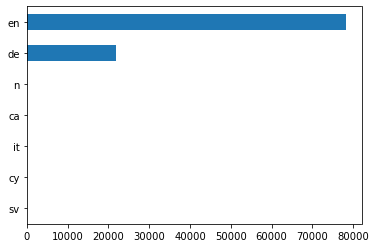

In [106]:
Meta["Language"].value_counts().sort_values().plot(kind = 'barh')

In [107]:
Meta["Token Amount"].max()

90100

<AxesSubplot:>

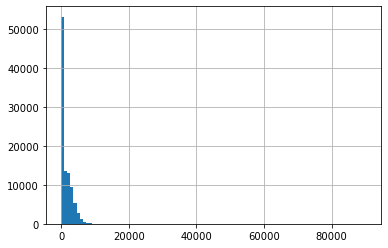

In [108]:
Meta["Token Amount"].hist(bins=100)

<AxesSubplot:>

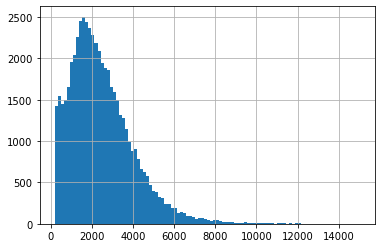

In [109]:
minTokenN=200
maxTokenN=15000
Meta["Token Amount"].hist(bins=100,range=(minTokenN,maxTokenN))

defined filters

In [ ]:
minTokenN=200
maxTokenN=15000
language="en"

# 2) Reference dataset transformation and alignment

The scientific article reference dataset "unpaywall" is used here in order to link the fulltext article with the corresponding meta data of unpaywall. It is shown how the unpaywall reference dataset is transformed into a Pandas dataframe and then merged withe preprocessing meta data. The merged dataframes can then be used as a sampling reference.The download of the unpaywall data dump is a prerquisite and not shown in this notebook

**2.1) Libraries and Paths**

## 2.1) Libraries and Paths
In this section the necessary Python libraries are loded and used throughout the whole corresponding chapter. Furthermore all of the content of the env_Juptyer files is globally loaded and contains path and defined variables.

In [1]:
import jsonlines
import time
import pandas as pd
import os
import dask.dataframe as dd
import pickle
from Functions.F2_Reference_Databases_and_Alignment import Clean_Joined_Df, Sankey_Dataframe, Sankey_DataFlow_Graph
import numpy as np
# import plotly.graph_objects as go
# import plotly.express as pex
# import matplotlib.pyplot as plt

In [2]:
from env_Jupyter import *
# with open('env_Jupyter.py', 'r') as f:
#     print(f.read())

## 2.2) Process unpaywall dataset

The database dump of unpaywall can be downloaded as described in the guide for generating the dataset. In this section the unpaywall dataset is unzipped, splitted, filtered and then saved as pickle files.

Unziped the paywall file on the synology, then used the split command from wsl

    1. scidb init

    2. cd /mnt/share/Reference_Databases/unpaywall/

    3. gunzip unpaywall_snapshot_2022-03-09T083001.jsonl.gz or 
        or gzip -dk unpaywall_snapshot_2022-03-09T083001.jsonl.gz
        or on windows with the 7zip tool (Process file on computer then copy it to the NAS)
        or Unzipping happened on windows side with 7zip, then the unziped file was transferred

    4.split -l 5000000 unpaywall_snapshot_2022-03-09T083001.jsonl

    5.Create a the following directory

        'Y:\\Reference_Databases\\unpaywall\\splitted'

    6.And move all of splitted files into this directory

---

Turn all of the splitted .jsonl files into pickle files.

In [7]:
# All of the files of the directory are listed
fileNameList=os.listdir(path)

# The loop goes trough all the files
for fileName in fileNameList:

    # And interim filepath is created for loading the file
    filepath= path + "\\" + fileName

    # Several timers are setup in order track the processing performance
    tic1 = time.perf_counter()
    tic2 = time.perf_counter()
    tic3 = time.perf_counter()

    # Epmpty list is created to store the extracted data and column names are assigned
    list_of_dfs=[]
    df = pd.DataFrame(columns=["doi","year",'is_oa','publisher','journal_name'])

    # The jsonlines fucntions is used in order to read the file line by line
    with jsonlines.open(filepath) as f:

        # Each line of the json line file is iterated
        for index, item in enumerate(f):
                # print(item.keys())

                # If a specific amounts of lines is processed, the processing time is logged
                if (index+1) % logEntries == 0: # example log every 100000 lines (100000 entries = 0:999999 python index)
                    toc2 = time.perf_counter()
                    print('index = {}'.format(index)," | df appending time in minutes: ",(toc2-tic2)/60, " | Length of list of dfs: ", len(list_of_dfs))
                    tic2 = time.perf_counter()
                
                # An empty dataframe is created and then the data from the item (line) is assigned to the dataframe
                # The dataframe is then appended to the list of dataframes
                # If the item can not be processed an message is printed
                try:
                    df = pd.DataFrame(columns=["doi","year",'is_oa','publisher','journal_name'])
                    data={"doi":item["doi"], 'genre':item['genre'],"year":item['year'],'title':item['title'],
                                "is_oa":item['is_oa'], "publisher":item['publisher'], "journal_name":item['journal_name']}
                    df=df.append(data,ignore_index=True)
                    list_of_dfs.append(df)
                except:
                    print(index, " could not be processed")

    print("------------------")
    print("Saving to disk")

    # The list of dataframes is then concatenated and saved to disk
    df = pd.concat(list_of_dfs, ignore_index=True)
    df.to_pickle(path + "\\" + fileName +".pkl")

    # The processing time is logged and the loop is continued
    list_of_dfs=[]
    toc3 = time.perf_counter()
    timediff=(toc3-tic3)/60
    print("Processing time in minutes: ", timediff)
    tic3 = time.perf_counter()


index = 99999  | df appending time in minutes:  6.330623411666602  | Length of list of dfs:  99999
index = 199999  | df appending time in minutes:  6.299679376666608  | Length of list of dfs:  199999
index = 299999  | df appending time in minutes:  6.339668698333359  | Length of list of dfs:  299999
index = 399999  | df appending time in minutes:  5.888828686666966  | Length of list of dfs:  399999
index = 499999  | df appending time in minutes:  5.650169656666791  | Length of list of dfs:  499999
index = 599999  | df appending time in minutes:  6.339302228333448  | Length of list of dfs:  599999
index = 699999  | df appending time in minutes:  6.341847920000146  | Length of list of dfs:  699999
index = 799999  | df appending time in minutes:  6.250748905000122  | Length of list of dfs:  799999
index = 899999  | df appending time in minutes:  6.175039761666752  | Length of list of dfs:  899999
index = 999999  | df appending time in minutes:  5.632902556667007  | Length of list of dfs: 

## 2.3) Concatenate reference dataset files

In order to process the data in an memory efficient manner Dask is applied. Because Dask can not read pickle filetypes the concatenated pickle files are transformed into a single csv file.

A list of available pickle files is created

In [3]:
# Get a list off all the unpaywall metadata .pkl files
fileNameList=os.listdir(path)
for name in fileNameList:
    if ".pkl" not in name:
        fileNameList.remove(name)
        print(name, "is removed")

xaa is removed
xab is removed
xac is removed
xad is removed
xae is removed
xaf is removed
xag is removed
xah is removed
xai is removed
xaj is removed
xak is removed
xal is removed
xam is removed
xan is removed
xao is removed
xap is removed
xaq is removed
xar is removed
xas is removed
xat is removed
xau is removed
xav is removed
xaw is removed
xax is removed
xay is removed
xaz is removed
xba is removed


First check if the file list is correct

In [4]:
fileNameList

['xaa.pkl',
 'xab.pkl',
 'xac.pkl',
 'xad.pkl',
 'xae.pkl',
 'xaf.pkl',
 'xag.pkl',
 'xah.pkl',
 'xai.pkl',
 'xaj.pkl',
 'xak.pkl',
 'xal.pkl',
 'xam.pkl',
 'xan.pkl',
 'xao.pkl',
 'xap.pkl',
 'xaq.pkl',
 'xar.pkl',
 'xas.pkl',
 'xat.pkl',
 'xau.pkl',
 'xav.pkl',
 'xaw.pkl',
 'xax.pkl',
 'xay.pkl',
 'xaz.pkl',
 'xba.pkl']

Each pickle file is transformed in a dask readable csv file

In [5]:
# Add the first file with headers to the csv file
df=pd.read_pickle(path +"\\"+ fileNameList[0])
df.to_csv(csvPath, mode='a', index=False, header=True)
print(fileNameList[0], "is appended")

# Append all file in the fileNameList into a single csv file
for name in fileNameList[1:]:
    df=pd.read_pickle(path+"\\"+name)
    df.to_csv(csvPath, mode='a', index=False, header=False)
    print(name, "is appended")

xaa.pkl is appended
xab.pkl is appended
xac.pkl is appended
xad.pkl is appended
xae.pkl is appended
xaf.pkl is appended
xag.pkl is appended
xah.pkl is appended
xai.pkl is appended
xaj.pkl is appended
xak.pkl is appended
xal.pkl is appended
xam.pkl is appended
xan.pkl is appended
xao.pkl is appended
xap.pkl is appended
xaq.pkl is appended
xar.pkl is appended
xas.pkl is appended
xat.pkl is appended
xau.pkl is appended
xav.pkl is appended
xaw.pkl is appended
xax.pkl is appended
xay.pkl is appended
xaz.pkl is appended
xba.pkl is appended


## 2.4) Read reference dataset and align with preprocessing meta data
Based on the doi from the unpaywall dataset and from the meta data file created after the preprocessing a subset of the unpaywall dataset is created. This subset only has rows which allow the fulltext retrieval based on the doi

The created csv file (unpwaywall dataset) is loaded

In [6]:
# Read the created csv file with dask
RefDf=dd.read_csv(csvPath, assume_missing=True) #some year dates are missing !!!

# show the amount of dask partitions
RefDf.npartitions

# Compute head
RefDf.head(n=5, npartitions=1, compute=True)

,doi,year,is_oa,publisher,journal_name,genre,title
0,10.1007/978-3-540-75404-6_41,NaN,True,Springer Berlin Heidelberg,Field and Service Robotics,book-chapter,Coordinated Search in Cluttered Environments U...
1,10.1515/phys-2018-0004,2018.0,True,Walter de Gruyter GmbH,Open Physics,journal-article,Design optimization of an axial-field eddy-cur...
2,10.21608/bjas.2020.136128,2020.0,True,Egypts Presidential Specialized Council for Ed...,Benha Journal of Applied Sciences,journal-article,Five Layers Repair in Management of Pilonidal ...
3,10.2223/jped.1597,2007.0,True,Jornal de Pediatria,Jornal de Pediatria,journal-article,Clinical value of lactate measurement and nucl...
4,10.3109/03639045.2013.767829,2013.0,False,Informa UK Limited,Drug Development and Industrial Pharmacy,journal-article,In vitroevaluation of the effects of various a...


Define Start and End directory for creating the joined and cleaned dataframe

In [7]:
StartDir=0
EndDir=99

The Filtered Preprocessing of the current directory is loaded and an inner join based on the doi to the reference database is performed. Then the CleanJoinedDf is applied to the joined dataframe.
The CleanJoinedDf function performs the following steps:
* Remove rows with titles which are not unique (All of the entries are deleted which are have a non unique title)
* Remove rows with dois which are not unique (All of the entries are deleted which are have a non unique doi)
* Missing values in the year and title column are deleted
* An additional column is added to the dataframe with the directory name
* Column names are renamed

In [ ]:
# Iterate trough data directories
for dirNum in range(StartDir,EndDir+1):

    # Create path to dictionary and read the preprocessed metadata file
    path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaData_Suffix)
    # path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaDataFiltered_Suffix)
    PpMetaDf=pd.read_pickle(path)

    # Transform Language column
    PpMetaDf["Language"]=[str(languageObject[0]) for languageObject in PpMetaDf["Language"]] # -> Up until dirNum 173 (see below)
    PpMetaDf["Language"]=PpMetaDf["Language"].str.replace('\d+', '', regex=True)
    PpMetaDf["Language"]=PpMetaDf["Language"].str.replace('.', '', regex=True)
    PpMetaDf["Language"]=PpMetaDf["Language"].str.replace(':', '', regex=True)

    #Harmonize Column Naming
    PpMetaDf.columns=["doi", "TokenAmount", "Language"]

    # Create inner join of the PpMetaDf and the RefDf
    join = RefDf.merge(PpMetaDf, how="inner", on=["doi"])
    tic = time.perf_counter()
    JoinedDf=join.compute()
    toc = time.perf_counter()
    print(toc-tic) 

    # Apply the CleanJoinedDf function to the dataframe
    LengthInfoDf, JoinedDf_Cleaned_4=Clean_Joined_Df(JoinedDf, dirNum)

    # Concatenate the LengthInfoDf with itself to create a dataframe with all the information if it is the first iteration
    if dirNum==StartDir:
        LengthInfoDf_All=LengthInfoDf
    else:
        LengthInfoDf_All=pd.concat([LengthInfoDf_All, LengthInfoDf], axis=0)

    # Save the joined and cleaned dataframe to a pickle file
    path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaDataJoined_Suffix)
    JoinedDf_Cleaned_4.to_pickle(path)
    print(path, "is saved")

    print("Directory ", dirNum, "is done")

# Save the LengthInfoDf to a pickle file
path=(AlignmentSankeyData_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + LengthInfoDf_Suffix)
LengthInfoDf_All.to_pickle(path)
print(path, "is saved")

# Save the LengthInfoDf to a csv file (without index)
path=(AlignmentSankeyData_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + LengthInfoDf_Suffix2)
LengthInfoDf_All.to_csv(path, index=False)

### 2.4.1) Further checks and infos on the aligned dataframes

The RefDb seems to have doulbe entries for the same DOI (The CleanedJoinedDf function resolved this for the metadatajoined dataframes)

In [ ]:
# Check if RefDb has double entries

doi="10.1002/(sici)1099-1387(199907)5:7<313::aid-psc200>3.0.co;2-f"
# Find the row in the RefDf dataframe which has the same doi as the doi variable
RefDf[RefDf["doi"]==doi].compute()
#                                                       doi    year  is_oa publisher                journal_name            genre                                              title
# 1043    10.1002/(sici)1099-1387(199907)5:7<313::aid-ps...  1999.0  False     Wiley  Journal of Peptide Science  journal-article  Assembly of binding loops on aromatic template...
# 244097  10.1002/(sici)1099-1387(199907)5:7<313::aid-ps...  1999.0  False     Wiley  Journal of Peptide Science  journal-article  Assembly of binding loops on aromatic template...

Load a MetaDataJoined dataframe and check if the doi and directory name can be used to retrieve the text file

In [6]:
path='Y:\\IntermediateData\\077_MetaDataJoined.pkl'
pathDOIPathDict='Y:\\IntermediateData\\077_DOI_Path_Dict.pkl'

Access a random row in the joined dataframe and print the corresponding fulltext by accessing the file with a constructed path (encoding necessary) or with the corresponding doi-path dictionary

In [8]:
# Load dataframe
df5=pd.read_pickle(path)

# Get the doi and data_dir value of the same random row  
random_index=np.random.randint(0,len(df5))

print("-----------------------------------------")
print("Random row of a MetaDataJoined dataframe")
print("-----------------------------------------")
print(df5.iloc[random_index])

print("-----------------------------------------")
print("Print of encoded doi")
print("-----------------------------------------")
doi=df5.iloc[random_index]["doi"]
data_dir=df5.iloc[random_index]["data_dir"]
# Encode the doi string similar to URL encoding
# Example: 'Y:\\Data\\00200000\\10.1002\\1521-4095(200110)13:20<1541::aid-adma1541>3.0.co;2-x.txt' ->  'Y:\\Data\\00200000\\10.1002\\1521-4095%28200110%2913%3A20%3C1541%3A%3Aaid-adma1541%3E3.0.co%3B2-x.txt'
import urllib.parse
doi_encoded=urllib.parse.quote(doi)
print(doi_encoded)

print("-----------------------------------------")
print("Part of the fulltext with path construct")
print("-----------------------------------------")
# Create a path to the text file with the doi and data_dir value
pathText=("Y:\\Data\\" + str(data_dir).zfill(3) + "00000\\" + doi_encoded + ".txt").replace("/", "\\")
print(pathText)
# Print the first 100 characters of the text file
with open(pathText, "r", encoding="utf8") as f:
    print(f.read(200))

print("-----------------------------------------")
print("Part of the fulltext with doi-path dict ")
print("-----------------------------------------")
# Load the _DOI_Path_Dict.pkl file
DOI_Path_Dict=pd.read_pickle(pathDOIPathDict)
path2=DOI_Path_Dict[doi]
print(path)
# Print the first 100 characters of the text file
with open(path2, "r", encoding="utf8") as f:
    print(f.read(200))

-----------------------------------------
Random row of a MetaDataJoined dataframe
-----------------------------------------
doi                                         10.1007/s101440050020
year                                                         1999
is_oa                                                       False
publisher                                                   Wiley
journal_name                                   Population Ecology
genre                                             journal-article
title           Relation between plant density and arthropod d...
token_amount                                                 2066
language                                                       en
data_dir                                                      077
Name: 172, dtype: object
-----------------------------------------
Print of encoded doi
-----------------------------------------
10.1007/s101440050020
-----------------------------------------
Part of the fulltext 

## 2.5) Sankey diagram of data flow
With a Sankey digaram it shown on how many entries of the unpaywall dataset were matched with the fulltext articles. Furthermore specific losses after unzipping, preprocessing and alignment are shown.

The following values are calculated for the visualization:

* compressed_pdf_files 
    * Amount of compressed pdf files for each directory
* unzipping_and_pdf2text_loss 
    * Amount of unzipping and pdf2text loss for each directory
* text_files 
    * Amount of text files for each directory
* preprocessing_loss 
    * Amount of preprocessing loss for each directory
* preprocessed_files 
    * Amount of preprocessed files for each directory
* alignment_loss 
    * Amount of alignment loss for each directory
* aligned_files 
    * Amount of aligned files for each directory
* ref_db_files 
    * Amount of entries in the reference database

Define which directories will be part of the visualization

In [9]:
StartDirSankey=0
EndDirSankey=875

The amount of entries in the unpaywall dataset is cacluated once and then hardcoded

In [10]:
ref_db_files=138268055
# ref_db_files=len(dd.read_csv(csvPath))  

The corresponding values for the visualization are calculated and saved to a dataframe

In [11]:
SankeyDf=Sankey_Dataframe(StartDirSankey, EndDirSankey, ref_db_files)
SankeyDf.to_csv(AlignmentSankeyData_Path+"SankeyDf.csv")

The above saved dataframe is loaded and the sankey plot is created

In [12]:
SankeyDf=pd.read_csv(AlignmentSankeyData_Path+"SankeyDf.csv")
fig=Sankey_DataFlow_Graph(SankeyDf)
fig.show()

## 2.6) Create cleaned SciView Dataset
Currently the aligned meta data is separated across 875 files. For model building purposes and future sharing of the data a single file is created.

Define the range of directories to include

In [13]:
StartDir=0
EndDir=875

Each directory is loaded and then appended to a single csv vile

In [14]:
# Create the csv file with headers based on the first joined Metadata 
path=(IntermediateData_Path + str(StartDir).zfill(3) + MetaDataJoined_Suffix)
MetaDataJoinedDf=pd.read_pickle(path)
MetaDataJoinedDf.to_csv(SciViewDataset_Path, mode='a', index=False, header=True)

# Iterate trough data directories and append without headers
for dirNum in range(StartDir+1,EndDir+1):

    # Create path to dictionary and read the preprocessed metadata file
    path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaDataJoined_Suffix)
    MetaDataJoinedDf=pd.read_pickle(path)
    MetaDataJoinedDf.to_csv(SciViewDataset_Path, mode='a', index=False, header=False)
    print(path, "is appended")

Y:\IntermediateData\001_MetaDataJoined.pkl is appended
Y:\IntermediateData\002_MetaDataJoined.pkl is appended
Y:\IntermediateData\003_MetaDataJoined.pkl is appended
Y:\IntermediateData\004_MetaDataJoined.pkl is appended
Y:\IntermediateData\005_MetaDataJoined.pkl is appended
Y:\IntermediateData\006_MetaDataJoined.pkl is appended
Y:\IntermediateData\007_MetaDataJoined.pkl is appended
Y:\IntermediateData\008_MetaDataJoined.pkl is appended
Y:\IntermediateData\009_MetaDataJoined.pkl is appended
Y:\IntermediateData\010_MetaDataJoined.pkl is appended
Y:\IntermediateData\011_MetaDataJoined.pkl is appended
Y:\IntermediateData\012_MetaDataJoined.pkl is appended
Y:\IntermediateData\013_MetaDataJoined.pkl is appended
Y:\IntermediateData\014_MetaDataJoined.pkl is appended
Y:\IntermediateData\015_MetaDataJoined.pkl is appended
Y:\IntermediateData\016_MetaDataJoined.pkl is appended
Y:\IntermediateData\017_MetaDataJoined.pkl is appended
Y:\IntermediateData\018_MetaDataJoined.pkl is appended
Y:\Interme

The length of the created dataset is printed

In [119]:
# Read the created csv file with dask
SciViewDf=dd.read_csv(SciViewDataset_Path)

# show the amount of dask partitions
print("Amount of partitions: ", SciViewDf.npartitions)

# Compute head
print("Length of the datafreame: ",len(SciViewDf))

Amount of partitions:  197
Length of the datafreame:  61892491


Show head of the dataframe

In [19]:
SciViewDf.head(n=5, compute=True)

,doi,year,is_oa,publisher,journal_name,genre,title,token_amount,language,data_dir
0,10.1002/(sici)1099-1387(199907)5:7<313::aid-ps...,1999,False,Wiley,Journal of Peptide Science,journal-article,Assembly of binding loops on aromatic template...,3423,en,0
1,10.1002/(sici)1099-1190(199905/06)9:3<155::aid...,1999,False,Wiley,International Journal of Network Management,journal-article,Managing service level agreements,4337,en,0
2,10.1002/(sici)1098-2337(1997)23:3<183::aid-ab4...,1997,False,Wiley,Aggressive Behavior,journal-article,Effects of prenatal cocaine and genotype on in...,3602,en,0
3,10.1002/(sici)1099-0518(199702)35:3<493::aid-p...,1997,False,Wiley,Journal of Polymer Science Part A: Polymer Che...,journal-article,Polyamides incorporating phosphine oxide group...,1430,en,0
4,10.1002/(sici)1098-237x(199707)81:4<445::aid-s...,1997,False,Wiley,Science Education,journal-article,Conceptions of high school students concerning...,5601,en,0


Show head of the tail of the dataframe. It can be note here that the dataframe index starts with every partition

In [20]:
SciViewDf.tail(n=5, compute=True)

,doi,year,is_oa,publisher,journal_name,genre,title,token_amount,language,data_dir
296332,10.1080/02701960.2021.1899918,2021,False,Informa UK Limited,Gerontology & Geriatrics Education,journal-article,An evaluation of a sustained senior mentor pro...,3575,en,875
296333,10.1109/tvt.2021.3063694,2021,False,Institute of Electrical and Electronics Engine...,IEEE Transactions on Vehicular Technology,journal-article,Performance Analysis of Cellular-Relay Vehicle...,7183,en,875
296334,10.5694/j.1326-5377.1949.tb70533.x,1949,False,AMPCo,Medical Journal of Australia,journal-article,THE NERVOUS AND CHEMICAL CONTROL OF THE UTERUS,1939,en,875
296335,10.1111/tgis.12720,2021,False,Wiley,Transactions in GIS,journal-article,"A scoping review on the use, processing and fu...",7364,en,875
296336,10.5694/j.1326-5377.1950.tb81167.x,1950,False,AMPCo,Medical Journal of Australia,journal-article,ANTIHISTAMINES AND THE COMMON COLD,696,en,875


### 2.6.1) Create statistical overview of the SciView Dataset

Load the SciView dataset

In [ ]:
# Read the created csv file with dask
SciViewDf=dd.read_csv(SciViewDataset_Path)

Show the year distribution

In [121]:
yearDd=SciViewDf["year"].value_counts().to_frame().reset_index()
yearDf=yearDd.compute()
yearDf.columns = ["years", "counts"]
yearDf=yearDf.sort_values(by="years",ascending=False).reset_index(drop=True)
yearDf

,years,counts
0,2109,1
1,2106,3
2,2104,2
3,2103,5
4,2088,6
...,...,...
344,1622,2
345,1620,5
346,1619,4
347,1512,1


Check the head of the dataframe 

In [122]:
yearDf.head(10)

,years,counts
0,2109,1
1,2106,3
2,2104,2
3,2103,5
4,2088,6
5,2081,21
6,2051,3
7,2038,3
8,2024,1
9,2022,3322


Remove the years above 2024 and reset index

In [123]:
x=0
y=8
yearDf.drop(yearDf.loc[x:y].index, inplace=True)
yearDf=yearDf.reset_index(drop=True)
yearDf

,years,counts
0,2022,3322
1,2021,1466272
2,2020,2427277
3,2019,2458958
4,2018,2279815
...,...,...
335,1622,2
336,1620,5
337,1619,4
338,1512,1


Check the tail of the dataframe 

In [124]:
yearDf.tail(10)

,years,counts
330,1648,18
331,1645,1
332,1644,6
333,1635,2
334,1626,28
335,1622,2
336,1620,5
337,1619,4
338,1512,1
339,0,30


Remove the year 0 and 1512

In [125]:
x=338
y=339
yearDf.drop(yearDf.loc[x:y].index, inplace=True)
yearDf=yearDf.reset_index(drop=True)
yearDf

,years,counts
0,2022,3322
1,2021,1466272
2,2020,2427277
3,2019,2458958
4,2018,2279815
...,...,...
333,1635,2
334,1626,28
335,1622,2
336,1620,5


Plot the year occurence as bars

Text(0.5, 1.0, 'Amount of Articles per Year')

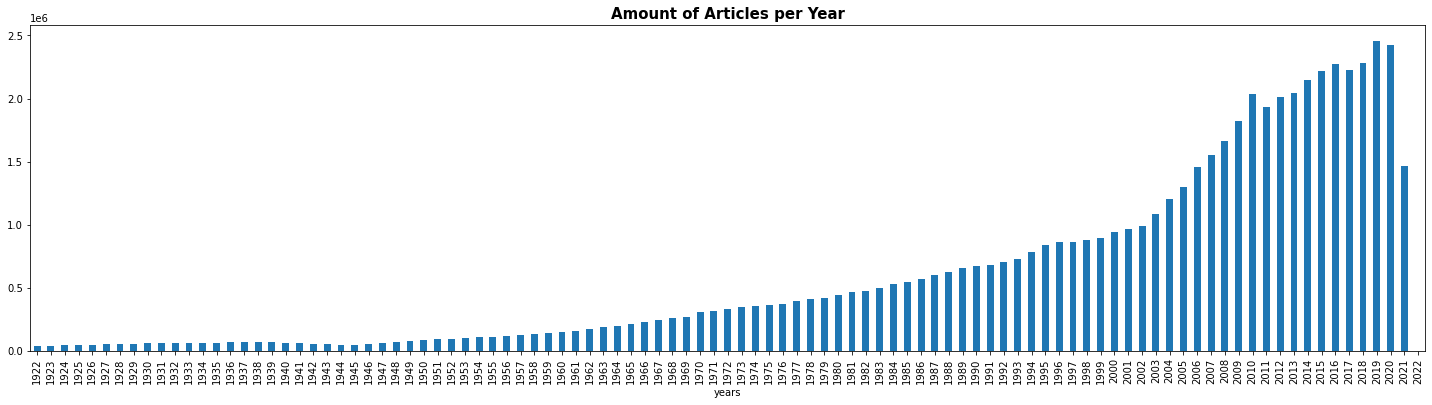

In [185]:
x=0
y=100
ax=yearDf.loc[x:y].sort_values(by="years",ascending=True).plot.bar(x='years', y='counts',figsize=(25, 6),legend=False)
ax.set_title('Amount of Articles per Year', fontdict={'fontsize': 15, 'fontweight': 'bold'})

Get the counts of open and non-open access

In [120]:
oaDd=SciViewDf["is_oa"].value_counts().to_frame().reset_index()
oaDf=oaDd.compute()

Rename the columns

In [177]:
oaDf.columns = ["is_oa", "Is Open Access"]
oaDf["is_oa"]=["False", "True"]
oaDf

,is_oa,Is Open Access
0,False,45963867
1,True,15928624


Plot the pie chart

Text(0.5, 1.0, 'Open Acess Distribution')

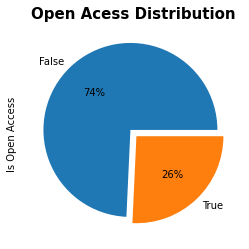

In [181]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
ax=oaDf.groupby(['is_oa']).sum().plot(kind='pie',y="Is Open Access", autopct='%1.0f%%', explode =explode, legend=False)
ax.set_title('Open Acess Distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})

# 3) Building Phrase Models, Dictionaries, Bow Corpus and LDA Models

## 3.1) Libraries and Paths
In this section the necessary Python libraries are loded and used throughout the whole corresponding chapter. Furthermore all of the content of the env_Juptyer files is globally loaded and contains path and defined variables.

In [1]:
import urllib.parse
import gensim
import json
import os
import time
import pandas as pd
import dask.dataframe as dd

In [2]:
from env_Jupyter import *
# with open('env_Jupyter.py', 'r') as f:
#     print(f.read())

## 3.2) Create Gensim Bigram Phrase Model

Create dir for saving the corresponding models. The naming is strutured based on the sample size and seed

In [3]:
ModelSavePath=ModelPath + str(sampleNDoc) + "_" + str(randomState)
os.mkdir(ModelSavePath)
print("Directory '% s' created" % ModelSavePath)

Directory 'Y:\Models\1000000_1234' created


Read the SciView dataset and sample rows based on a defined number and seed

In [4]:
# Read the created csv file with dask
SciViewDd=dd.read_csv(SciViewDataset_Path)

# num_rows is precalculated in the env_Jupyter.py file
# num_rows = len(SciViewDd)

# Sample random entries of the Meta data by applying the pandas sample function to the meta data frame
SciViewDfSample=SciViewDd.sample(frac=sampleNDoc/num_rows, random_state=randomState,replace=None)
SciViewDfSample=SciViewDfSample.compute()
print ("Target sampling amount: ", sampleNDoc , " Actual Sample size: ", len(SciViewDfSample))

# Rese Index and print the dataframe
SciViewDfSample=SciViewDfSample.reset_index(drop=True)
SciViewDfSample

Target sampling amount:  1000000  Actual Sample size:  999998


,doi,year,is_oa,publisher,journal_name,genre,title,token_amount,language,data_dir
0,10.1002/ad.647,2008,False,Wiley,Architectural Design,journal-article,Engineering Ecologies,1545,en,2
1,10.1002/(sici)1521-4141(199912)29:12<4043::aid...,1999,True,Wiley,European Journal of Immunology,journal-article,Resting small B cells present endogenous immun...,4266,en,1
2,10.1002/(sici)1099-1158(200004)5:2<107::aid-ij...,2000,False,Wiley,International Journal of Finance & Economics,journal-article,Assessing the credibility of a target zone: ev...,4435,en,0
3,10.1002/(sici)1097-0010(199909)79:12<1666::aid...,1999,False,Wiley,Journal of the Science of Food and Agriculture,journal-article,Ovomucin content and composition in chicken eg...,2074,en,0
4,10.1002/9783527635603.ch11,2011,False,Wiley-VCH Verlag GmbH & Co. KGaA,Fischer-Tropsch Refining,book-chapter,Shell Middle Distillate Synthesis (SMDS) Facil...,2346,en,2
...,...,...,...,...,...,...,...,...,...,...
999993,10.1007/s15202-021-4650-5,2021,False,Springer Science and Business Media LLC,DNP - Der Neurologe & Psychiater,journal-article,Wirksame Therapien für Alkoholabhängige,1756,de,874
999994,10.1016/j.neuchi.2020.11.007,2021,False,Elsevier BV,Neurochirurgie,journal-article,Bruns nystagmus occurring after resection of a...,1115,en,874
999995,10.1016/j.camwa.2021.04.015,2021,False,Elsevier BV,Computers & Mathematics with Applications,journal-article,Numerical analysis of Finite-Difference Time-D...,4815,en,874
999996,10.1109/eeae49144.2020.9279052,2020,False,IEEE,2020 7th International Conference on Energy Ef...,proceedings-article,Study on the effect of some major environmenta...,1745,en,872


Create the streaming generator for the bigram phrase model input

In [5]:
class Corpus_Stream_Bigram:
    def __iter__(self):
        for i in range(0,len(SciViewDfSample)):
            
            # Get the doi and data_dir of the current row in of the sample
            doi, data_dir=SciViewDfSample[["doi","data_dir"]].loc[i]

            # doi has to be encoded through urllib and certain characters have to be manualy changed
            #               Storage location        1 -> 001                      Get prefix of Doi (10.1093)       Join with "/"        Get Suffix of Doi and replace / to %2F              Add ending      Replace all / with \\                 
            pathText=("Y:\\IntermediateData\\" + str(data_dir).zfill(3) + "\\" + urllib.parse.quote(doi).split('/', 1)[0] + "/" + urllib.parse.quote(doi).split('/', 1)[1].replace("/","%2F") + ".json").replace("/", "\\")

            # Try opening the file if the path is correctly encoded
            try:
                with open(pathText, "r", encoding="utf8") as f:
                    yield json.load(f)
            except:
                print(pathText, doi)

Stream to the bigram model and then freeze for faster processing later. Then save the model

In [6]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Create bigram model based on the corpus
bigram = gensim.models.phrases.Phrases(Corpus_Stream_Bigram(), min_count=bigramMinFreq, threshold=bigramThreshold, max_vocab_size=phraseVocabSize)

# Freeze and save bigram model
frozen_bigram_model = bigram.freeze()
frozen_bigram_model.save(ModelSavePath + "\\" + BigramPhraseModel_Suffix)
print("Bigram Model is saved as: ", ModelSavePath + "\\" + BigramPhraseModel_Suffix)

#Stop global timer and print
toc = time.perf_counter()
print("Total processing time took: ",(toc-tic)/60, " min")

Bigram Model is saved as:  Y:\Models\1000000_1234\BigramPhraseModel.pkl
Total processing time took:  1834.6932305266614  min


## 3.3) Create Gensim Dictionary Model

Create dir for saving the corresponding models. The naming is strutured based on the sample size and seed

In [7]:
ModelSavePath=ModelPath + str(sampleNDoc) + "_" + str(randomState)
# checking if the directory demo_folder 
# exist or not.
if not os.path.exists(ModelSavePath):
    os.mkdir(ModelSavePath)
    print("Directory '% s' created" % ModelSavePath)
else:
    print("Directory '% s' already exists" % ModelSavePath)

Directory 'Y:\Models\1000000_1234' already exists


Read the SciView dataset and sample rows based on a defined number and seed

In [8]:
# Read the created csv file with dask
SciViewDd=dd.read_csv(SciViewDataset_Path)

# num_rows is precalculated in the env_Jupyter.py file
# num_rows = len(SciViewDd)

# Sample random entries of the Meta data by applying the pandas sample function to the meta data frame
SciViewDfSample=SciViewDd.sample(frac=sampleNDoc/num_rows, random_state=randomState,replace=None)
SciViewDfSample=SciViewDfSample.compute()
print ("Target sampling amount: ", sampleNDoc , " Actual Sample size: ", len(SciViewDfSample))

# Rese Index and print the dataframe
SciViewDfSample=SciViewDfSample.reset_index(drop=True)
SciViewDfSample

Target sampling amount:  10000  Actual Sample size:  9999


,doi,year,is_oa,publisher,journal_name,genre,title,token_amount,language,data_dir
0,10.1002/ad.647,2008,False,Wiley,Architectural Design,journal-article,Engineering Ecologies,1545,en,2
1,10.1002/(sici)1521-4141(199912)29:12<4043::aid...,1999,True,Wiley,European Journal of Immunology,journal-article,Resting small B cells present endogenous immun...,4266,en,1
2,10.1002/(sici)1099-1158(200004)5:2<107::aid-ij...,2000,False,Wiley,International Journal of Finance & Economics,journal-article,Assessing the credibility of a target zone: ev...,4435,en,0
3,10.1002/(sici)1097-0010(199909)79:12<1666::aid...,1999,False,Wiley,Journal of the Science of Food and Agriculture,journal-article,Ovomucin content and composition in chicken eg...,2074,en,0
4,10.1002/9783527635603.ch11,2011,False,Wiley-VCH Verlag GmbH & Co. KGaA,Fischer-Tropsch Refining,book-chapter,Shell Middle Distillate Synthesis (SMDS) Facil...,2346,en,2
...,...,...,...,...,...,...,...,...,...,...
9994,10.1080/14786419.2021.1895149,2021,False,Informa UK Limited,Natural Product Research,journal-article,3-aryl-indolinones derivatives as antiplasmodi...,1788,en,872
9995,10.1088/1742-6596/1760/1/012039,2021,True,IOP Publishing,Journal of Physics: Conference Series,journal-article,Analysis of students’ Higher Order Thinking Sk...,1973,en,872
9996,10.1080/15476286.2021.1894025,2021,True,Informa UK Limited,RNA Biology,journal-article,Localization of RNAs in the nucleus: cis- and ...,8174,en,872
9997,10.1111/imj.15211,2021,False,Wiley,Internal Medicine Journal,journal-article,Effectiveness of a locality‐based integrated d...,3112,en,872


Load the saved bigram model

In [8]:
frozen_bigram_model=gensim.models.phrases.Phrases.load(ModelSavePath + "\\" + BigramPhraseModel_Suffix)

Create the streaming generator for the dictionary model input

In [9]:
class Corpus_Stream_Dictionary:
    def __iter__(self):
        for i in range(0,len(SciViewDfSample)):
            
            # Get the doi and data_dir of the current row in of the sample
            doi, data_dir=SciViewDfSample[["doi","data_dir"]].loc[i]

            # doi has to be encoded through urllib and certain characters have to be manualy changed
            #               Storage location        1 -> 001                      Get prefix of Doi (10.1093)       Join with "/"        Get Suffix of Doi and replace / to %2F              Add ending      Replace all / with \\                 
            pathText=("Y:\\IntermediateData\\" + str(data_dir).zfill(3) + "\\" + urllib.parse.quote(doi).split('/', 1)[0] + "/" + urllib.parse.quote(doi).split('/', 1)[1].replace("/","%2F") + ".json").replace("/", "\\")

            # Try opening the file if the path is correctly encoded
            try:
                with open(pathText, "r", encoding="utf8") as f:
                    # print(frozen_bigram_model[f])
                    yield frozen_bigram_model[json.load(f)]
            except:
                print(pathText, doi)

Stream to the dictionary model and then save the model

In [10]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

dct=gensim.corpora.Dictionary(Corpus_Stream_Dictionary(), prune_at=dictVocab)
dct.save(ModelSavePath + "\\" + DictionaryModel_Suffix)

print("Dictionary Model is saved as: ", ModelSavePath + "\\" + DictionaryModel_Suffix)

#Stop global timer and print
toc = time.perf_counter()
print("Total processing time took: ",(toc-tic)/60, " min")

Dictionary Model is saved as:  Y:\Models\1000000_1234\DictionaryModel.pkl
Total processing time took:  1523.646111214999  min


## 3.4 Create Gensim LDA Model

Create dir for saving the corresponding models. The naming is strutured based on the sample size and seed

In [12]:
ModelSavePath=ModelPath + str(sampleNDoc) + "_" + str(randomState)
# checking if the directory demo_folder 
# exist or not.
if not os.path.exists(ModelSavePath):
    os.mkdir(ModelSavePath)
    print("Directory '% s' created" % ModelSavePath)
else:
    print("Directory '% s' already exists" % ModelSavePath)

Directory 'Y:\Models\10000_1234' already exists


Read the SciView dataset and sample rows based on a defined number and seed

In [13]:
# Read the created csv file with dask
SciViewDd=dd.read_csv(SciViewDataset_Path)

# num_rows is precalculated in the env_Jupyter.py file
# num_rows = len(SciViewDd)

# Sample random entries of the Meta data by applying the pandas sample function to the meta data frame
SciViewDfSample=SciViewDd.sample(frac=sampleNDoc/num_rows, random_state=randomState,replace=None)
SciViewDfSample=SciViewDfSample.compute()
print ("Target sampling amount: ", sampleNDoc , " Actual Sample size: ", len(SciViewDfSample))

# Rese Index and print the dataframe
SciViewDfSample=SciViewDfSample.reset_index(drop=True)
SciViewDfSample

Target sampling amount:  10000  Actual Sample size:  9999


,doi,year,is_oa,publisher,journal_name,genre,title,token_amount,language,data_dir
0,10.1002/ad.647,2008,False,Wiley,Architectural Design,journal-article,Engineering Ecologies,1545,en,2
1,10.1002/(sici)1521-4141(199912)29:12<4043::aid...,1999,True,Wiley,European Journal of Immunology,journal-article,Resting small B cells present endogenous immun...,4266,en,1
2,10.1002/(sici)1099-1158(200004)5:2<107::aid-ij...,2000,False,Wiley,International Journal of Finance & Economics,journal-article,Assessing the credibility of a target zone: ev...,4435,en,0
3,10.1002/(sici)1097-0010(199909)79:12<1666::aid...,1999,False,Wiley,Journal of the Science of Food and Agriculture,journal-article,Ovomucin content and composition in chicken eg...,2074,en,0
4,10.1002/9783527635603.ch11,2011,False,Wiley-VCH Verlag GmbH & Co. KGaA,Fischer-Tropsch Refining,book-chapter,Shell Middle Distillate Synthesis (SMDS) Facil...,2346,en,2
...,...,...,...,...,...,...,...,...,...,...
9994,10.1080/14786419.2021.1895149,2021,False,Informa UK Limited,Natural Product Research,journal-article,3-aryl-indolinones derivatives as antiplasmodi...,1788,en,872
9995,10.1088/1742-6596/1760/1/012039,2021,True,IOP Publishing,Journal of Physics: Conference Series,journal-article,Analysis of students’ Higher Order Thinking Sk...,1973,en,872
9996,10.1080/15476286.2021.1894025,2021,True,Informa UK Limited,RNA Biology,journal-article,Localization of RNAs in the nucleus: cis- and ...,8174,en,872
9997,10.1111/imj.15211,2021,False,Wiley,Internal Medicine Journal,journal-article,Effectiveness of a locality‐based integrated d...,3112,en,872


Load dictionary and bigram model

In [11]:
frozen_bigram_model=gensim.models.phrases.Phrases.load(ModelSavePath + "\\" + BigramPhraseModel_Suffix)
dct=gensim.corpora.Dictionary.load(ModelSavePath + "\\" + DictionaryModel_Suffix)

Create the streaming generator for the lda model input

In [12]:
class Corpus_Stream_LDA:
    def __iter__(self):
        for i in range(0,len(SciViewDfSample)):
            
            # Get the doi and data_dir of the current row in of the sample
            doi, data_dir=SciViewDfSample[["doi","data_dir"]].loc[i]

            # doi has to be encoded through urllib and certain characters have to be manualy changed
            #               Storage location        1 -> 001                      Get prefix of Doi (10.1093)       Join with "/"        Get Suffix of Doi and replace / to %2F              Add ending      Replace all / with \\                 
            pathText=("Y:\\IntermediateData\\" + str(data_dir).zfill(3) + "\\" + urllib.parse.quote(doi).split('/', 1)[0] + "/" + urllib.parse.quote(doi).split('/', 1)[1].replace("/","%2F") + ".json").replace("/", "\\")

            # Try opening the file if the path is correctly encoded
            try:
                with open(pathText, "r", encoding="utf8") as f:
                    # print(frozen_bigram_model[f])
                    yield dct.doc2bow(frozen_bigram_model[json.load(f)], allow_update=False)
            except:
                print(pathText, doi)

Stream to the lda model and then save the model

In [13]:
import time
tic = time.perf_counter()

lda = gensim.models.ldamodel.LdaModel(corpus=Corpus_Stream_LDA(), 
                                      id2word=dct,
                                      num_topics=25,
                                      update_every=1,
                                      chunksize=10000,
                                      passes=1)

lda.save(ModelSavePath + "\\" + LDA_Suffix)
print("Dictionary Model is saved as: ", ModelSavePath + "\\" + LDA_Suffix)

#Stop global timer and print
toc = time.perf_counter()
print("Total processing time took: ",(toc-tic)/60, " min")

Dictionary Model is saved as:  Y:\Models\1000000_1234\LDA.model
Total processing time took:  3194.894536413338  min


## 3.4 Inspect created Models

___


# Other

## Inspect LDA Model

Load Data

In [6]:
ldaModel=gensim.models.LdaModel.load(path_creator("ldaModel",[Model_Path, StartDir, EndDir, LDA_Suffix]))

In [7]:
ldaModel.get_topic_terms(49, topn=10)

[(630, 0.1447978),
 (4014, 0.082529694),
 (750, 0.05273371),
 (4430, 0.049176764),
 (3222, 0.03889558),
 (483, 0.029007148),
 (42, 0.026837647),
 (693, 0.024881952),
 (8293, 0.022647828),
 (439, 0.016011156)]

In [8]:
ldaModel.print_topics(-1,num_words=10)

[(0,
  '0.114*"group" + 0.028*"risk" + 0.019*"age" + 0.019*"year" + 0.014*"difference" + 0.012*"factor" + 0.011*"health" + 0.010*"exposure" + 0.010*"population" + 0.009*"total"'),
 (1,
  '0.029*"energy" + 0.018*"state" + 0.010*"field" + 0.009*"phys_rev" + 0.009*"magnetic" + 0.009*"physic" + 0.009*"electron" + 0.008*"phys" + 0.008*"density" + 0.008*"transition"'),
 (2,
  '0.082*"see" + 0.026*"li" + 0.025*"wang" + 0.019*"chen" + 0.018*"zhang" + 0.017*"lee" + 0.015*"liu" + 0.011*"yang" + 0.011*"china" + 0.010*"wu"'),
 (3,
  '0.037*"tissue" + 0.035*"cancer" + 0.029*"skin" + 0.027*"tumor" + 0.021*"bone" + 0.016*"liver" + 0.012*"lesion" + 0.011*"tumour" + 0.011*"ultrasound" + 0.009*"lung"'),
 (4,
  '0.020*"parameter" + 0.015*"distribution" + 0.011*"error" + 0.010*"probability" + 0.008*"set" + 0.008*"estimate" + 0.008*"average" + 0.007*"variable" + 0.007*"factor" + 0.007*"size"'),
 (5,
  '0.051*"water" + 0.022*"soil" + 0.021*"rock" + 0.014*"area" + 0.010*"site" + 0.010*"pore" + 0.009*"surface

Load a document and infer the topic of this document then check if the output makes sense

## List of words to remove

In [ ]:
"et"
"al"
"la"
"de"
"ch"
"ii"
"university"
"th"

## Jupyter Dash
Installatio according to:
https://dash.plotly.com/installation

In [2]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output# Load Data

In [ ]:
df = px.data.tips()# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )# Run app and display result inline in the notebook
app.run_server(mode='inline')

In [9]:
app = JupyterDash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(mode='inline')